In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy
from IPython.display import clear_output
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
#Using sequential models
model = Sequential();

In [3]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [37]:
# 1 hidden layer with 40 neurons - ReLU and Softmax
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(40, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [46]:
def plot_acc_loss(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [47]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[plot_losses], batch_size=1, verbose=2)
scores = model.evaluate(X_train, y_train, verbose=0)
print("Train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Train Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.3252 - acc: 0.9076 - val_loss: 0.2024 - val_acc: 0.9424
Epoch 2/20
 - 3s - loss: 0.1855 - acc: 0.9475 - val_loss: 0.1634 - val_acc: 0.9535
Epoch 3/20
 - 3s - loss: 0.1516 - acc: 0.9578 - val_loss: 0.1429 - val_acc: 0.9586
Epoch 4/20
 - 3s - loss: 0.1321 - acc: 0.9628 - val_loss: 0.1313 - val_acc: 0.9611
Epoch 5/20
 - 2s - loss: 0.1181 - acc: 0.9667 - val_loss: 0.1203 - val_acc: 0.9648
Epoch 6/20
 - 3s - loss: 0.1079 - acc: 0.9697 - val_loss: 0.1136 - val_acc: 0.9673
Epoch 7/20
 - 2s - loss: 0.0996 - acc: 0.9716 - val_loss: 0.1090 - val_acc: 0.9677
Epoch 8/20
 - 3s - loss: 0.0929 - acc: 0.9740 - val_loss: 0.1035 - val_acc: 0.9695
Epoch 9/20
 - 3s - loss: 0.0873 - acc: 0.9758 - val_loss: 0.1001 - val_acc: 0.9697
Epoch 10/20
 - 2s - loss: 0.0824 - acc: 0.9771 - val_loss: 0.0973 - val_acc: 0.9704
Epoch 11/20
 - 3s - loss: 0.0781 - acc: 0.9782 - val_loss: 0.0955 - val_acc: 0.9708
Epoch 12/20
 - 3s - loss: 0.0746 - 

['acc', 'loss', 'val_acc', 'val_loss']


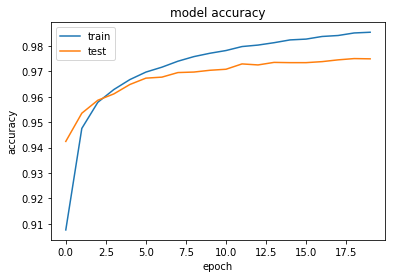

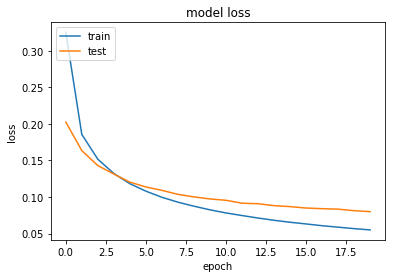

In [48]:
plot_acc_loss(history)

In [49]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Test Error: %.2f%%" % (100-scores[1]*100))

Test acc: 97.49%
Test Error: 2.51%


In [50]:
# 1 hidden layer with 196 neurons -> ReLU and Softmax
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [51]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
scores = model.evaluate(X_train, y_train, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Test Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.3270 - acc: 0.9079 - val_loss: 0.2083 - val_acc: 0.9403
Epoch 2/20
 - 2s - loss: 0.1870 - acc: 0.9477 - val_loss: 0.1647 - val_acc: 0.9538
Epoch 3/20
 - 2s - loss: 0.1527 - acc: 0.9566 - val_loss: 0.1463 - val_acc: 0.9575
Epoch 4/20
 - 2s - loss: 0.1330 - acc: 0.9629 - val_loss: 0.1307 - val_acc: 0.9624
Epoch 5/20
 - 3s - loss: 0.1194 - acc: 0.9672 - val_loss: 0.1214 - val_acc: 0.9641
Epoch 6/20
 - 2s - loss: 0.1088 - acc: 0.9700 - val_loss: 0.1150 - val_acc: 0.9652
Epoch 7/20
 - 2s - loss: 0.1007 - acc: 0.9727 - val_loss: 0.1085 - val_acc: 0.9682
Epoch 8/20
 - 2s - loss: 0.0936 - acc: 0.9744 - val_loss: 0.1041 - val_acc: 0.9686
Epoch 9/20
 - 3s - loss: 0.0878 - acc: 0.9759 - val_loss: 0.0995 - val_acc: 0.9697
Epoch 10/20
 - 2s - loss: 0.0828 - acc: 0.9777 - val_loss: 0.0980 - val_acc: 0.9705
Epoch 11/20
 - 2s - loss: 0.0781 - acc: 0.9789 - val_loss: 0.0948 - val_acc: 0.9710
Epoch 12/20
 - 2s - loss: 0.0744 - 

['acc', 'loss', 'val_acc', 'val_loss']


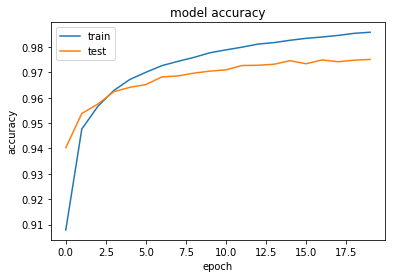

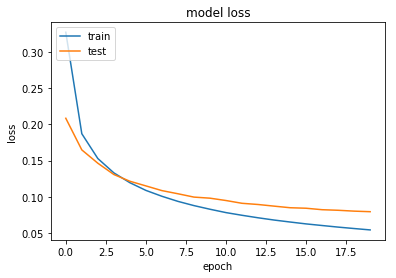

In [52]:
plot_acc_loss(history)

In [53]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Test Error: %.2f%%" % (100-scores[1]*100))

Test acc: 97.51%
Test Error: 2.49%


In [67]:
#increasing number of neurons from 40 to 196 does not improve accuracy by a large amount, we add more hidden layers
# 2 hidden layers - 196 neurons in each - ReLU and Softmax
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2811 - acc: 0.9137 - val_loss: 0.1456 - val_acc: 0.9572
Epoch 2/20
 - 3s - loss: 0.1271 - acc: 0.9627 - val_loss: 0.1133 - val_acc: 0.9654
Epoch 3/20
 - 3s - loss: 0.0957 - acc: 0.9721 - val_loss: 0.0956 - val_acc: 0.9704
Epoch 4/20
 - 4s - loss: 0.0785 - acc: 0.9768 - val_loss: 0.0895 - val_acc: 0.9727
Epoch 5/20
 - 3s - loss: 0.0663 - acc: 0.9805 - val_loss: 0.0846 - val_acc: 0.9735
Epoch 6/20
 - 3s - loss: 0.0572 - acc: 0.9834 - val_loss: 0.0794 - val_acc: 0.9769
Epoch 7/20
 - 3s - loss: 0.0506 - acc: 0.9859 - val_loss: 0.0748 - val_acc: 0.9777
Epoch 8/20
 - 3s - loss: 0.0446 - acc: 0.9873 - val_loss: 0.0753 - val_acc: 0.9762
Epoch 9/20
 - 3s - loss: 0.0399 - acc: 0.9889 - val_loss: 0.0724 - val_acc: 0.9789
Epoch 10/20
 - 3s - loss: 0.0361 - acc: 0.9903 - val_loss: 0.0708 - val_acc: 0.9794
Epoch 11/20
 - 4s - loss: 0.0328 - acc: 0.9910 - val_loss: 0.0697 - val_acc: 0.9791
Epoch 12/20
 - 3s - loss: 0.0296 - 

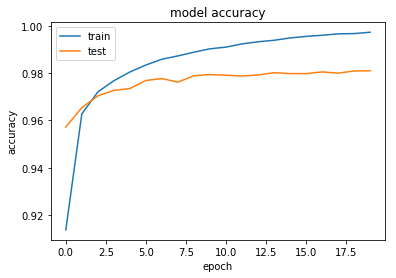

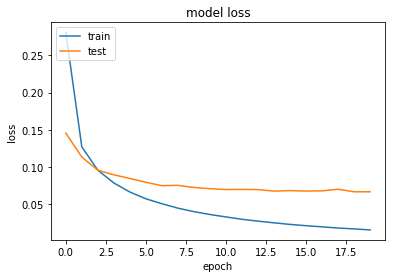

In [68]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
scores = model.evaluate(X_train, y_train, verbose=0)
print("Train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Train Error: %.2f%%" % (100-scores[1]*100))
plot_acc_loss(history)

In [70]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Test Error: %.2f%%" % (100-scores[1]*100))

Test acc: 98.10%
Test Error: 1.90%


In [73]:
#Note that the test accuracy increased. We try adding one more layer to see if test accuracy goes up further
# 3 hidden layers - 196 neurons in each - ReLU and Softmax
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(196, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.3159 - acc: 0.9020 - val_loss: 0.1419 - val_acc: 0.9548
Epoch 2/20
 - 4s - loss: 0.1157 - acc: 0.9655 - val_loss: 0.1071 - val_acc: 0.9669
Epoch 3/20
 - 4s - loss: 0.0843 - acc: 0.9746 - val_loss: 0.0860 - val_acc: 0.9731
Epoch 4/20
 - 4s - loss: 0.0656 - acc: 0.9804 - val_loss: 0.0752 - val_acc: 0.9749
Epoch 5/20
 - 4s - loss: 0.0537 - acc: 0.9836 - val_loss: 0.0720 - val_acc: 0.9775
Epoch 6/20
 - 5s - loss: 0.0436 - acc: 0.9877 - val_loss: 0.0731 - val_acc: 0.9758
Epoch 7/20
 - 5s - loss: 0.0368 - acc: 0.9896 - val_loss: 0.0662 - val_acc: 0.9793
Epoch 8/20
 - 5s - loss: 0.0307 - acc: 0.9918 - val_loss: 0.0686 - val_acc: 0.9789
Epoch 9/20
 - 5s - loss: 0.0260 - acc: 0.9932 - val_loss: 0.0677 - val_acc: 0.9781
Epoch 10/20
 - 5s - loss: 0.0223 - acc: 0.9944 - val_loss: 0.0635 - val_acc: 0.9801
Epoch 11/20
 - 5s - loss: 0.0190 - acc: 0.9959 - val_loss: 0.0664 - val_acc: 0.9802
Epoch 12/20
 - 5s - loss: 0.0165 - 

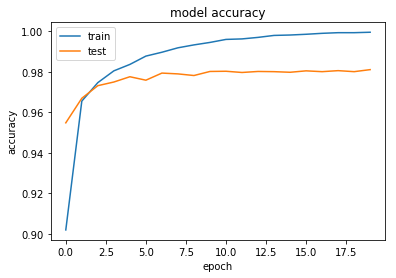

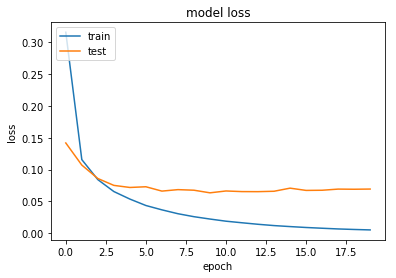

In [74]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
scores = model.evaluate(X_train, y_train, verbose=0)
print("Train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Train Error: %.2f%%" % (100-scores[1]*100))
plot_acc_loss(history)

In [75]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("Test Error: %.2f%%" % (100-scores[1]*100))

Test acc: 98.10%
Test Error: 1.90%
